In [ ]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import random

In [5]:
url = 'https://raw.githubusercontent.com/Catrilao/tareasBD3/refs/heads/main/facebook_combined.txt'
dataset = pd.read_csv(url, sep=' ', header=None, names=['source', 'target'])
dataset

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


## Cálculo de Medidas de Centralidad en la Red

In [6]:
G = nx.from_pandas_edgelist(dataset, source='source', target='target')

# Confirmar que el grafo se ha creado correctamente
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

Número de nodos: 4039
Número de aristas: 88234


In [7]:
G = nx.from_pandas_edgelist(dataset, source = 'source', target = 'target' )
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

results = pd.DataFrame({
    'node': list(G.nodes),
    'closeness': [closeness[node] for node in G.nodes],
    'betweenness': [betweenness[node] for node in G.nodes],
    'pagerank': [pagerank[node] for node in G.nodes]
})

print(results)

      node  closeness   betweenness  pagerank
0        0   0.353343  1.463059e-01  0.006290
1        1   0.261376  2.783274e-06  0.000236
2        2   0.261258  7.595021e-08  0.000203
3        3   0.261376  1.685066e-06  0.000226
4        4   0.261258  1.840332e-07  0.000238
...    ...        ...           ...       ...
4034  4034   0.183989  0.000000e+00  0.000094
4035  4035   0.183980  0.000000e+00  0.000068
4036  4036   0.183989  0.000000e+00  0.000106
4037  4037   0.184005  7.156847e-08  0.000148
4038  4038   0.184047  6.338922e-07  0.000296

[4039 rows x 4 columns]


In [8]:
# Visualización de métricas de centralidad

# Distribución de Closeness
#sns.histplot(results['closeness'], kde=True).set(title='Distribución de Closeness')
#plt.show()


In [9]:
# Distribución de PageRank
#sns.histplot(results['pagerank'], kde=True).set(title='Distribución de PageRank')
#plt.show()

In [10]:
#sns.histplot(results['betweenness'], kde=True).set(title='Distribución de Betweenness')
#plt.show()

In [11]:
#Encontrae el nodo con el valor más alto para cada métrica
max_closeness_node = max(closeness, key=closeness.get)
max_betweenness_node = max(betweenness, key=betweenness.get)
max_pagerank_node = max(pagerank, key=pagerank.get)

#Obtener los valores máximos correspondientes
max_closeness_value = closeness[max_closeness_node]
max_betweenness_value = betweenness[max_betweenness_node]
max_pagerank_value = pagerank[max_pagerank_node]

#mostrar los resultados
print(f"Nodo con mayor Closeness: {max_closeness_node} (Valor: {max_closeness_value})")
print(f"Nodo con mayor Betweenness: {max_betweenness_node} (Valor: {max_betweenness_value})")
print(f"Nodo con mayor PageRank: {max_pagerank_node} (Valor: {max_pagerank_value})")

Nodo con mayor Closeness: 107 (Valor: 0.45969945355191255)
Nodo con mayor Betweenness: 107 (Valor: 0.4805180785560152)
Nodo con mayor PageRank: 3437 (Valor: 0.0076145868447496)


In [12]:
nx.density(G)

0.010819963503439287

In [13]:
# 1. Agregar pesos a las aristas (influencia entre usuarios)
for u, v in G.edges():
    G[u][v]['weight'] = random.uniform(0.1, 0.7)  # Pesos aleatorios

# 2. Agregar umbrales a los nodos
for node in G.nodes():
    G.nodes[node]['threshold'] = random.uniform(0.1, 0.4)  # Umbrales aleatorios

# 3. Seleccionar nodos iniciales activados (semillas)
activated_nodes = set([random.choice(list(G.nodes))])

# 4. Función para calcular la influencia acumulada en un nodo
def calculate_influence(G, node, activated_nodes):
    total_influence = 0
    for neighbor in G.neighbors(node):
        if neighbor in activated_nodes:
            total_influence += G[neighbor][node]['weight']  # Sumar pesos de vecinos activados
    return total_influence

# 5. Propagación según el modelo LTM
def linear_threshold_model(G, activated_nodes):
    newly_activated = set()  # Nodos que se activarán en esta iteración

    for node in G.nodes():
        if node not in activated_nodes:  # Solo consideramos nodos inactivos
            influence = calculate_influence(G, node, activated_nodes)
            if influence >= G.nodes[node]['threshold']:
                newly_activated.add(node)  # Activar nodo si la influencia acumulada supera su umbral

    return newly_activated

# 6. Simulación de la propagación
iteration = 0
last_iteration_activated = set()
while True:
    print(f"Iteración {iteration}: Nodos activados hasta ahora -> {activated_nodes}")
    newly_activated = linear_threshold_model(G, activated_nodes)
    if not newly_activated:  # Si no hay más activaciones, terminamos
        break
    last_iteration_activated = newly_activated  # Guardamos los nodos activados en esta iteración
    activated_nodes.update(newly_activated)  # Agregamos los nuevos nodos activados
    iteration += 1

# Mostrar el resultado final
print(f"Propagación finalizada en {iteration} iteraciones")
print(f"Nodos activados finales: {activated_nodes}")
print(f"Nodos activados en la última iteración ({iteration}): {last_iteration_activated}")
print(f"Cantidad de nodos activados en la última iteración: {len(last_iteration_activated)}")

Iteración 0: Nodos activados hasta ahora -> {2313}
Iteración 1: Nodos activados hasta ahora -> {2049, 2433, 2051, 2439, 2440, 2313, 2441, 1930, 2317, 2448, 2322, 2450, 2581, 2199, 2214, 2342, 2089, 1964, 1965, 2099, 2100, 2227, 2230, 2358, 2232, 2361, 2488, 2107, 2614, 2047, 2113, 2242, 2371, 2628, 2119, 2120, 2249, 2376, 2251, 2380, 2632, 2126, 2129, 2130, 2644, 2133, 2145, 2402, 2406, 2534, 2540, 2160, 2162, 2548, 2422, 1912, 2041, 2431}
Iteración 2: Nodos activados hasta ahora -> {2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 58, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 213

## Modelo Linear Threshold Model

In [14]:
# Función Linear Threshold Model
def linear_threshold_model(G, activated_nodes, max_steps=10):
    iteration = 0
    newly_activated = set(activated_nodes)
    iteration_map = {node: 0 for node in activated_nodes}  # Nodos semilla activados en iteración 0
    active_nodes_count_per_iteration = []  # Lista para registrar número de nodos activados por iteración

    while iteration < max_steps and newly_activated:
        next_activated = set()
        for node in G.nodes():
            if node not in activated_nodes:
                influence = sum(
                    G[neighbor][node].get('weight', 0) for neighbor in G.neighbors(node) if neighbor in activated_nodes
                )
                if influence >= G.nodes[node]['threshold']:
                    next_activated.add(node)
                    iteration_map[node] = iteration + 1  # Registrar iteración de activación

        activated_nodes.update(next_activated)
        active_nodes_count_per_iteration.append(len(next_activated))  # Registrar cantidad de nodos activados
        newly_activated = next_activated
        iteration += 1

    # Imprimir número de nodos activados por iteración
    print("Nodos activados por iteración:")
    for i, count in enumerate(active_nodes_count_per_iteration):
        print(f"Iteración {i}: {count} nodos activados")

    return activated_nodes, iteration_map

# Función para graficar el LTM
def plot_ltm_graph(G, activated_nodes, iteration_map):
    pos = nx.spring_layout(G, seed=42)

    # Colorear nodos según la iteración en que fueron activados
    colors = [iteration_map.get(node, -1) for node in G.nodes()]
    sizes = [G.nodes[node]['threshold'] * 100 for node in G.nodes()]  # Tamaño proporcional al umbral

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color=colors,
        node_size=sizes,
        with_labels=True,
        cmap=plt.cm.coolwarm,
        edge_color='gray'
    )
    plt.title("Linear Threshold Model (LTM) - Activación por iteración")
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=0, vmax=max(colors)))
    sm.set_array([])
    plt.colorbar(sm, label="Iteración de activación")
    plt.show()


In [15]:
def plot_ltm_graph(G, activated_nodes, iteration_map):
    import matplotlib.pyplot as plt
    import networkx as nx  # Asegúrate de tener networkx importado

    # Generar posiciones consistentes
    pos = nx.spring_layout(G, seed=42)

    # Colorear nodos según la iteración en que fueron activados
    colors = [iteration_map.get(node, -1) for node in G.nodes()]
    sizes = [G.nodes[node]['threshold'] * 100 for node in G.nodes()]  # Tamaño proporcional al umbral

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 8))

    # Graficar nodos sin etiquetas
    nx.draw(
        G,
        pos,
        node_color=colors,
        node_size=sizes,
        with_labels=False,  # Sin etiquetas en los nodos
        cmap=plt.cm.coolwarm,
        edge_color='gray',
        ax=ax  # Pasar objeto de ejes
    )

    # Título y barra de color
    plt.title("Linear Threshold Model (LTM) - Activación por iteración")
    plt.colorbar(
        plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), ax=ax, label="Iteración de activación"
    )
    plt.show()


Nodos activados por iteración:
Iteración 0: 267 nodos activados
Iteración 1: 876 nodos activados
Iteración 2: 1722 nodos activados
Iteración 3: 806 nodos activados
Iteración 4: 140 nodos activados
Iteración 5: 192 nodos activados
Iteración 6: 11 nodos activados
Iteración 7: 0 nodos activados


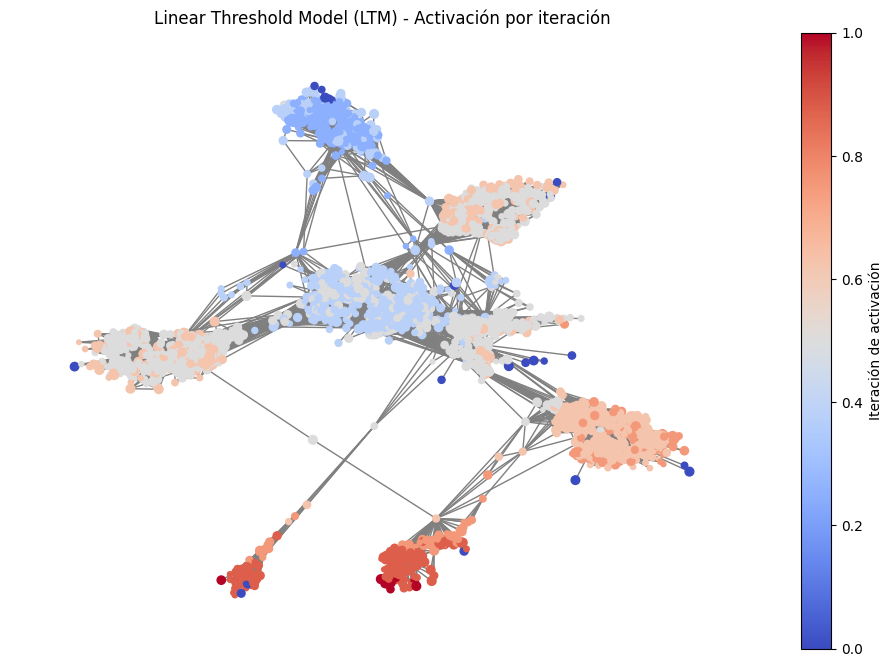

In [16]:
seed_nodes = [0, 1, 2]  # Nodos iniciales
ltm_result, iteration_map = linear_threshold_model(G, set(seed_nodes))
plot_ltm_graph(G, ltm_result, iteration_map)

##  Modelo independent cascade

In [17]:
def independent_cascade_model(G, activated_nodes, prob=0.1, max_steps=10):
    iteration = 0
    newly_activated = set(activated_nodes)
    activation_map = {node: 0 for node in activated_nodes}  # Registrar nodos semilla en iteración 0

    while iteration < max_steps and newly_activated:
        next_activated = set()
        for node in newly_activated:
            for neighbor in G.neighbors(node):
                if neighbor not in activated_nodes and random.uniform(0, 1) < prob:
                    next_activated.add(neighbor)
                    activation_map[neighbor] = iteration + 1  # Registrar iteración de activación

        activated_nodes.update(next_activated)
        newly_activated = next_activated
        iteration += 1

    return activated_nodes, activation_map

In [18]:
def plot_icm_graph(G, activated_nodes, seed_nodes, activation_map):
    import matplotlib.pyplot as plt
    import networkx as nx  # Asegúrate de tener networkx importado

    # Generar posiciones consistentes
    pos = nx.spring_layout(G, seed=42)

    # Colorear nodos según la iteración de activación
    colors = [activation_map.get(node, -1) for node in G.nodes()]
    sizes = [50 if node not in activated_nodes else 200 for node in G.nodes()]  # Destacar nodos activados

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 8))

    # Graficar nodos sin etiquetas
    nx.draw(
        G,
        pos,
        node_color=colors,
        node_size=sizes,
        with_labels=False,  # Sin etiquetas en los nodos
        cmap=plt.cm.plasma,
        edge_color='gray',
        ax=ax  # Pasar objeto de ejes
    )

    # Título y barra de color
    plt.title("Independent Cascade Model (ICM) - Activación por iteración")
    plt.colorbar(
        plt.cm.ScalarMappable(cmap=plt.cm.plasma), ax=ax, label="Iteración de activación"
    )
    plt.show()


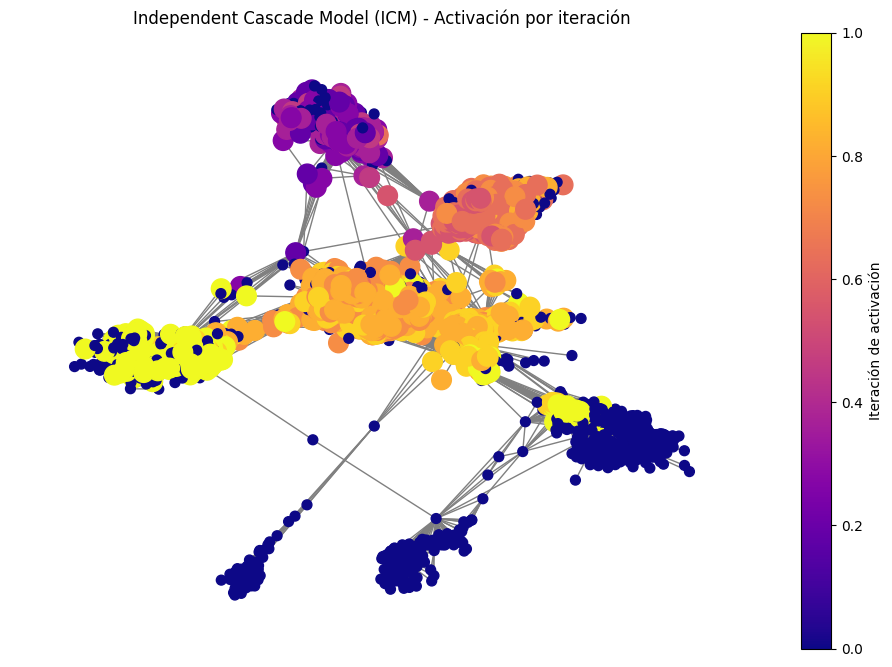

In [19]:
icm_result, activation_map = independent_cascade_model(G, set(seed_nodes), prob=0.2)
plot_icm_graph(G, icm_result, seed_nodes, activation_map)

# Evaluación de la Dispersión de Influencia en Nodos Centrales


4) Calcular la dispersión de influencia sobre los top-10 nodos obtenidos por cada medida de
centralidad. Esto implica 4 (o 5, si la red es dirigida) ejecuciones. Puede modificar el dataset
incluyendo una función peso y/o de etiquetado, en caso de ser necesario y que tenga sentido
con el dominio del problema (20%)

In [20]:
top_10_closeness = pd.DataFrame(results['closeness'].sort_values(ascending=False).head(10))
top_10_closeness

,closeness
107,0.459699
58,0.397402
350,0.394837
371,0.393913
351,0.393606
171,0.370493
348,0.369916
366,0.369848
349,0.369543
362,0.366558


In [21]:
top_10_betweenness = pd.DataFrame(results['betweenness'].sort_values(ascending=False).head(10))
top_10_betweenness

,betweenness
107,0.480518
351,0.337797
1821,0.236115
352,0.229295
571,0.149015
0,0.146306
1843,0.115330
1710,0.096310
58,0.084360
350,0.064309


In [22]:
top_10_pagerank = pd.DataFrame(results['pagerank'].sort_values(ascending=False).head(10))
top_10_pagerank

,pagerank
1821,0.007615
107,0.006936
351,0.006367
0,0.006290
352,0.003877
348,0.002348
1831,0.002219
1827,0.002170
349,0.001800
1843,0.001317


In [23]:
nodos_centrales = pd.DataFrame({
    'Nodo': [f"nodo{n}" for n in range(10)],
    'Closeness': [top_10_closeness.loc[node, 'closeness'] for node in top_10_closeness.index],
    'Betweenness': [top_10_betweenness.loc[node, 'betweenness'] for node in top_10_betweenness.index],
    'PageRank': [top_10_pagerank.loc[node, 'pagerank'] for node in top_10_pagerank.index]
})
nodos_centrales

,Nodo,Closeness,Betweenness,PageRank
0,nodo0,0.459699,0.480518,0.007615
1,nodo1,0.397402,0.337797,0.006936
2,nodo2,0.394837,0.236115,0.006367
3,nodo3,0.393913,0.229295,0.006290
4,nodo4,0.393606,0.149015,0.003877
5,nodo5,0.370493,0.146306,0.002348
6,nodo6,0.369916,0.115330,0.002219
7,nodo7,0.369848,0.096310,0.002170
8,nodo8,0.369543,0.084360,0.001800
9,nodo9,0.366558,0.064309,0.001317


# Análisis de Correlación entre Rankings de Centralidad

In [52]:
from scipy.stats import spearmanr
correlation_results = pd.DataFrame(index=['closeness', 'betweenness', 'pagerank'], columns=['closeness', 'betweenness', 'pagerank'])

for col1 in ['closeness', 'betweenness', 'pagerank']:
    for col2 in ['closeness', 'betweenness', 'pagerank']:
        if col1 != col2:
            corr, p_value = spearmanr(results[col1], results[col2])
            correlation_results.loc[col1.replace('_rank', ''), col2.replace('_rank', '')] = corr
            correlation_results.loc[col1.replace('_rank', ''), col2.replace('_rank', '') + '_p'] = p_value
correlation_results

,closeness,betweenness,pagerank,betweenness_p,pagerank_p,closeness_p
closeness,NaN,0.479157,0.233855,5.817900e-231,2.670219e-51,NaN
betweenness,0.479157,NaN,0.758397,NaN,0.000000e+00,5.817900e-231
pagerank,0.233855,0.758397,NaN,0.000000e+00,NaN,2.670219e-51


Filtrado de resultados con p-value < 0.05

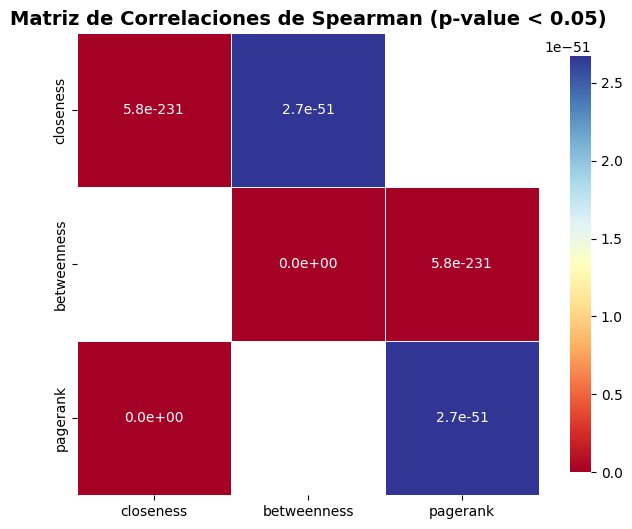

In [88]:
corr_matrix = correlation_results.iloc[:, :3]

p_value_matrix = correlation_results.iloc[:, 3:]
filtered_corr_matrix = p_value_matrix[p_value_matrix < 0.05]

plt.figure(figsize=(8, 6))
sns.heatmap(
    filtered_corr_matrix,
    annot    = True,
    cmap     = 'RdYlBu',
    fmt      = ".1e",
    square   = True,
    cbar_kws = {"shrink": 0.9},
    vmin     = filtered_corr_matrix.min().min(),
    vmax     = filtered_corr_matrix.max().max(),
    linewidths=0.5,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.index
)
plt.title('Matriz de Correlaciones de Spearman (p-value < 0.05)', fontsize=14, fontweight='bold')
plt.show()